In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
path = "./model_data/part-00000-8f3d2c8d-e21b-4ae6-a337-4cbd28bb3ac8-c000.csv"

dadosfixes = pd.read_csv(path)


In [4]:
dadosfixes.head()

,GameRound,nSets,Ground,Prize,GameRank_winner,GameRank_loser,Year,Height_dif,winner_home,loser_home,comb_hands,rank_dif
0,Round of 16,2,Hard,6134605.0,14.0,937.869318,2016,NaN,0,0,Null,923.869318
1,Round of 32,2,Clay,10000.0,625.0,621.000000,2012,NaN,0,0,Null,4.000000
2,Round of 32,3,Clay,10000.0,1485.0,1473.000000,2008,NaN,0,0,Null,12.000000
3,Round of 32,3,Hard,10000.0,785.0,511.000000,2006,11.0,0,1,RR,274.000000
4,2nd Round Qualifying,2,Hard,50000.0,436.0,1305.181818,2008,NaN,0,0,Null,869.181818


In [6]:
dadosfixes['comb_hands'].replace(["Null"], np.nan, inplace=True)
dadosfixes["Height_dif"].replace(["NaN"], np.nan, inplace=True)

In [7]:
max_height_dif = dadosfixes['Height_dif'].max()
print("Maximum Height Difference:", max_height_dif)

Maximum Height Difference: 43.0


Number of games per height difference:
(0, 5]      18963
(5, 10]     13217
(10, 15]     7670
(15, 20]     3266
(20, 25]     1104
(25, 30]      395
(30, 35]      131
(35, 40]       33
(40, 45]       10
Name: height_dif_range, dtype: int64


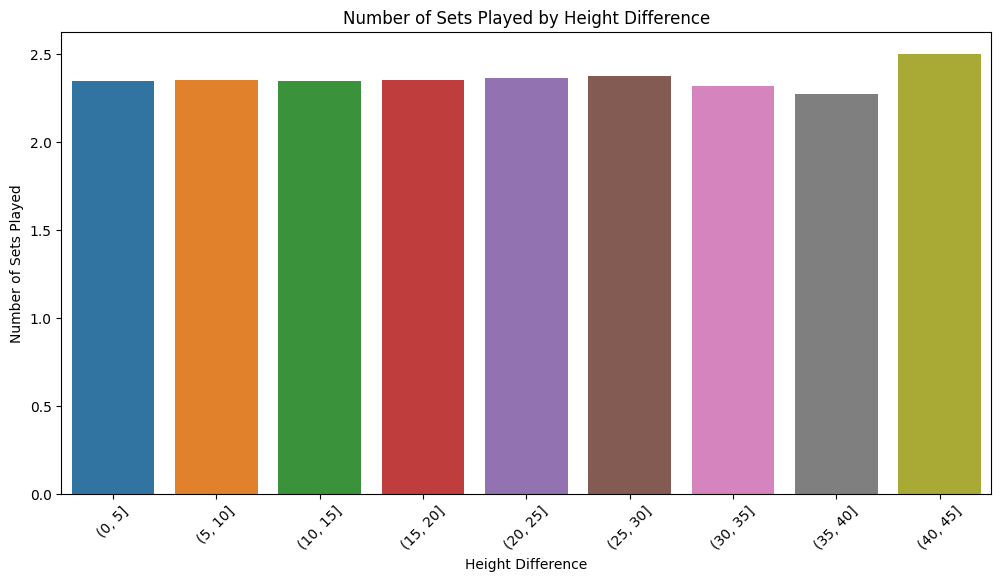

In [12]:
bin_edges = range(0, 46, 5)
dadosfixes['height_dif_range'] = pd.cut(dadosfixes['Height_dif'], bins=bin_edges)
games_per_range = len(dadosfixes)  # Use the total number of games for each range
stratified_sampler = StratifiedShuffleSplit(n_splits=1, test_size=games_per_range, random_state=42)
filtered_data = dadosfixes.groupby('height_dif_range').apply(lambda x: x.sample(min(games_per_range, len(x))))
filtered_data = filtered_data.reset_index(drop=True)
grouped_data = filtered_data.groupby('height_dif_range')['nSets'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='height_dif_range', y="nSets")
plt.xlabel('Height Difference')
plt.ylabel('Number of Sets Played')
plt.title('Number of Sets Played by Height Difference'.format(games_per_range))
plt.xticks(rotation=45)
bin_counts = dadosfixes['height_dif_range'].value_counts().sort_index()
print("Number of games per height difference:")
print(bin_counts)
plt.show()


<AxesSubplot: title={'center': 'Win Percentage by Combination of Hand'}>

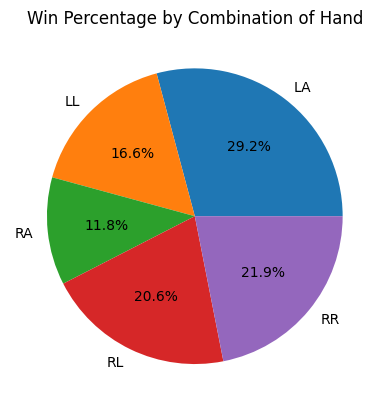

In [8]:
maos_vitorias = dadosfixes.loc[dadosfixes["comb_hands"].notnull(), "winner_home"].groupby(dadosfixes["comb_hands"]).mean() * 100
maos_vitorias.plot(kind= "pie", title="Win Percentage by Combination of Hand", ylabel= "", autopct= "%1.1f%%")

<AxesSubplot: title={'center': 'Number of Sets by Combination of Hand'}, xlabel='Combination of Hands', ylabel='Number of Sets'>

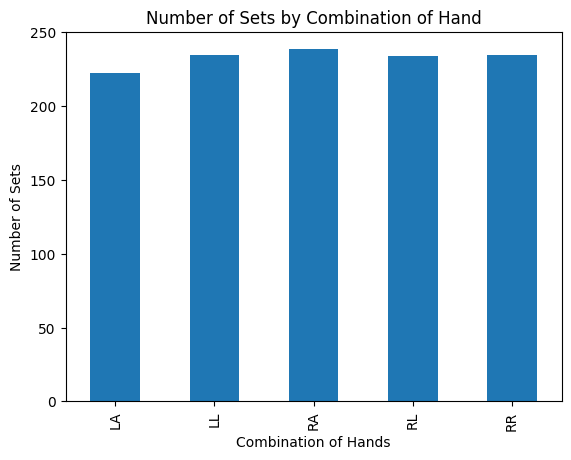

In [9]:
maos_numerosets = dadosfixes.loc[dadosfixes["comb_hands"].notnull(), "nSets"].groupby(dadosfixes["comb_hands"]).mean() * 100
maos_numerosets.plot(kind= "bar", title="Number of Sets by Combination of Hand", xlabel = "Combination of Hands", ylabel= "Number of Sets")

In [10]:
jogos_por_ronda = 5
sets_por_gameround = (dadosfixes.groupby('GameRound')['nSets'].apply(lambda x: x.sample(n=jogos_por_ronda)).groupby("GameRound").sum())
print(sets_por_gameround)

GameRound
1st Round Qualifying    10
2nd Round Qualifying    12
3rd Round Qualifying    10
3rd/4th Place Match     11
Finals                  13
Quarter-Finals          12
Round Robin             12
Round of 128            11
Round of 16             12
Round of 32             11
Round of 64             13
Semi-Finals             11
Name: nSets, dtype: int64


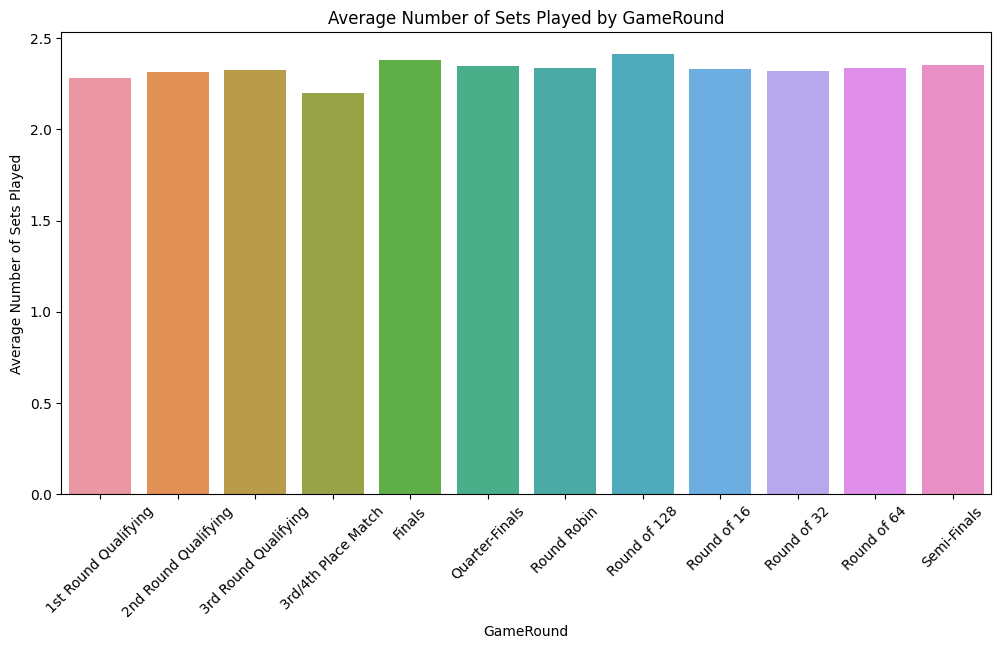

In [17]:
grouped_data = dadosfixes.groupby('GameRound')['nSets'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='GameRound', y='nSets')
plt.xlabel('GameRound')
plt.ylabel('Average Number of Sets Played')
plt.title('Average Number of Sets Played by GameRound')
plt.xticks(rotation=45)
plt.show()


In [ ]:
### prize

In [21]:
max_prize = dadosfixes['Prize'].max()
print("Maximum value of prize:", max_prize)

Maximum value of prize: 8584055.0


In [ ]:
### muito confuso demasiados valores distintos

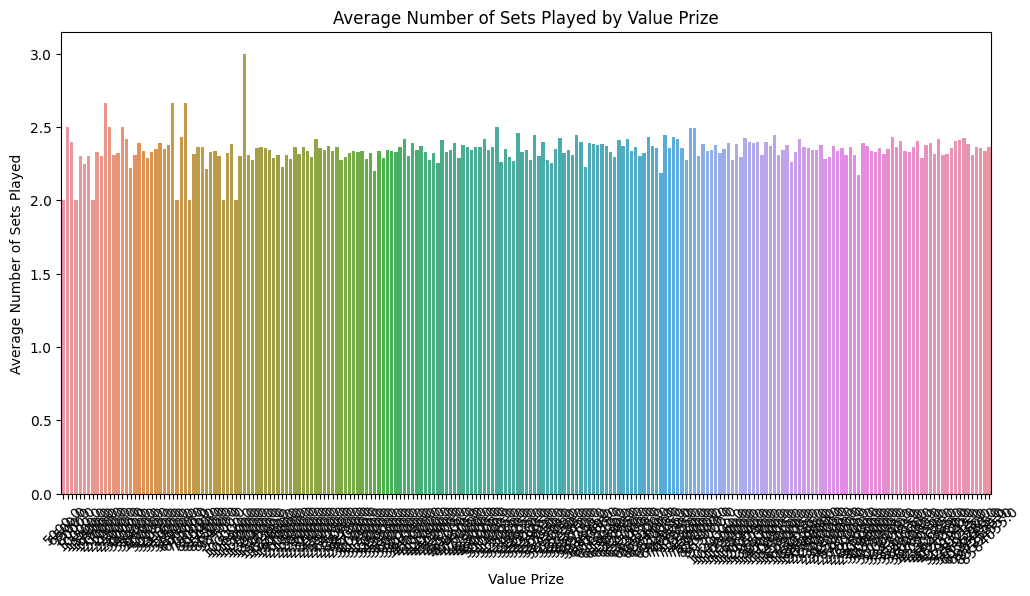

In [18]:
grouped_data = dadosfixes.groupby('Prize')['nSets'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Prize', y='nSets')
plt.xlabel('Value Prize')
plt.ylabel('Average Number of Sets Played')
plt.title('Average Number of Sets Played by Value Prize')
plt.xticks(rotation=45)
plt.show()


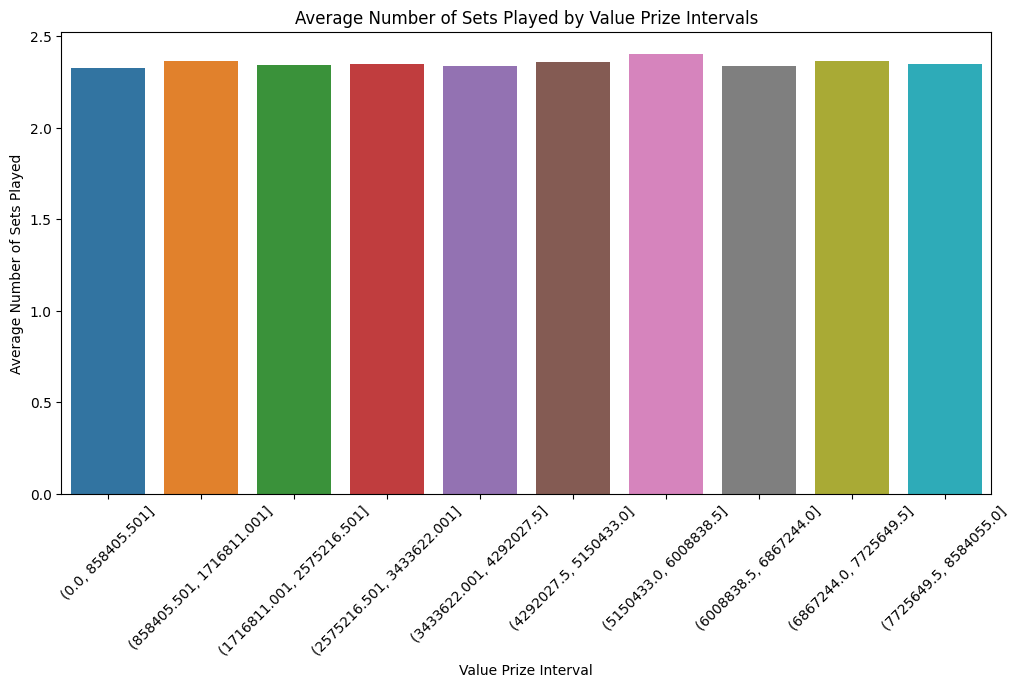

In [28]:
# intervalos para ser mais perceptivel
import numpy as np
num_intervals = 10
bin_edges = np.linspace(0.001, dadosfixes['Prize'].max(), num_intervals + 1)
dadosfixes['value_prize_interval'] = pd.cut(dadosfixes['Prize'], bins=bin_edges, include_lowest=True)
grouped_data = dadosfixes.groupby('value_prize_interval')['nSets'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='value_prize_interval', y='nSets')
plt.xlabel('Value Prize Interval')
plt.ylabel('Average Number of Sets Played')
plt.title('Average Number of Sets Played by Value Prize Intervals')
plt.xticks(rotation=45)
plt.show()


In [11]:
max_rank_diff = dadosfixes['rank_dif'].max()
print("Maximum Rank Difference:", max_rank_diff)

Maximum Rank Difference: 2299.0


Number of games in each bin:
(0.0, 229.9]        46056
(229.9, 459.8]      11194
(459.8, 689.7]       5450
(689.7, 919.6]       3366
(919.6, 1149.5]      2402
(1149.5, 1379.4]     1761
(1379.4, 1609.3]     1423
(1609.3, 1839.2]     1766
(1839.2, 2069.1]     1552
(2069.1, 2299.0]      737
Name: rank_dif_range, dtype: int64


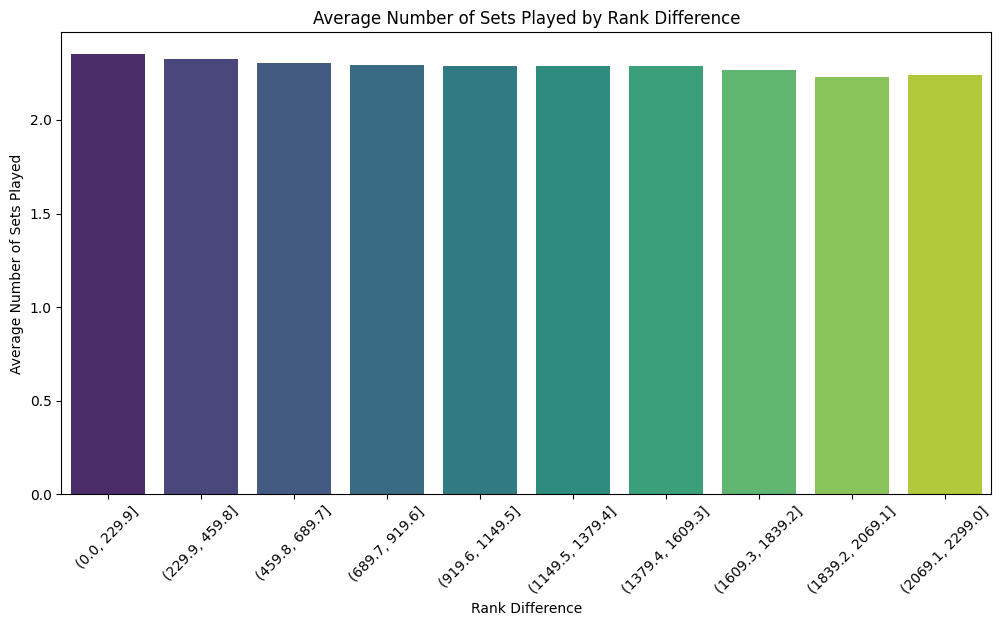

In [10]:
num_bins = 10
bin_edges = np.linspace(0, dadosfixes['rank_dif'].max(), num_bins + 1)
dadosfixes['rank_dif_range'] = pd.cut(dadosfixes['rank_dif'], bins=bin_edges)
grouped_data = dadosfixes.groupby('rank_dif_range')['nSets'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='rank_dif_range', y='nSets', palette='viridis')
plt.xlabel('Rank Difference')
plt.ylabel('Average Number of Sets Played')
plt.title('Average Number of Sets Played by Rank Difference')
plt.xticks(rotation=45)
bin_counts = dadosfixes['rank_dif_range'].value_counts().sort_index()
print("Number of games in each bin:")
print(bin_counts)
plt.show()

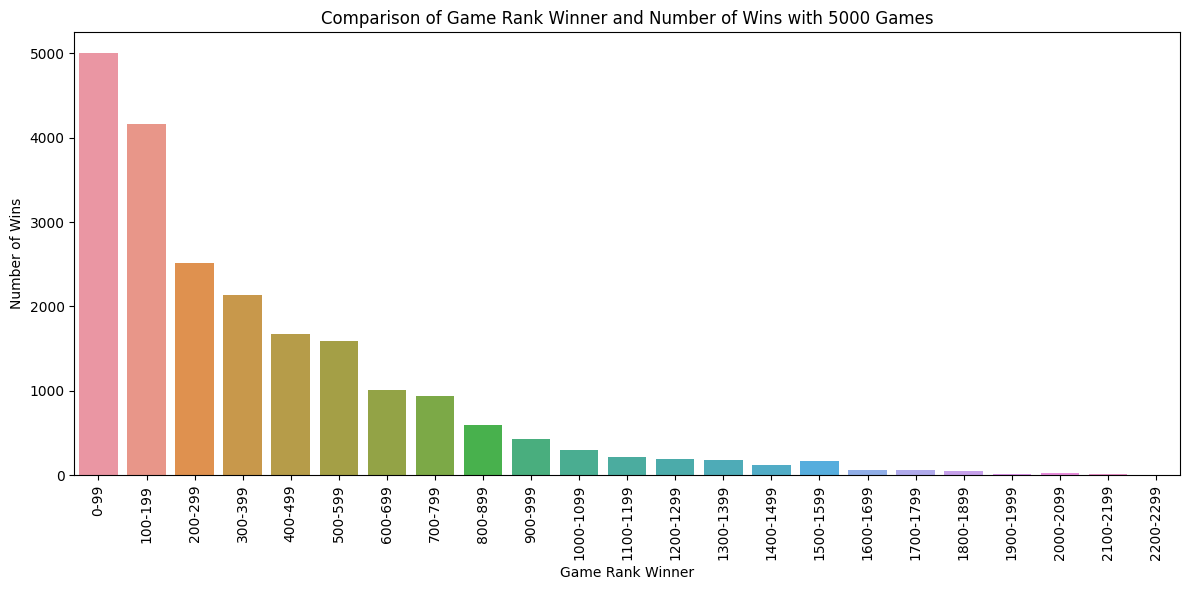

In [13]:
bin_edges = list(range(0, 2301, 100))  
bin_labels = [f'{i}-{i+99}' for i in bin_edges[:-1]]
dadosfixes['GameRank_winner_range'] = pd.cut(dadosfixes['GameRank_winner'], bins=bin_edges, labels=bin_labels, right=False)
games_per_range = 5000
winner_home_value = 1
sampled_data = dadosfixes[dadosfixes['winner_home'] == winner_home_value].groupby('GameRank_winner_range').apply(lambda x: x.sample(min(games_per_range, len(x))))
sampled_data = sampled_data.reset_index(drop=True)
grouped_data = sampled_data.groupby('GameRank_winner_range').size().reset_index(name='count')
grouped_data = grouped_data.reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='GameRank_winner_range', y='count')
plt.xlabel('Game Rank Winner')
plt.ylabel('Number of Wins')
plt.title('Comparison of Game Rank Winner and Number of Wins with 5000 Games')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

/tmp/ipykernel_34/1556326466.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(group.sample(min(games_per_year, len(group))))
/tmp/ipykernel_34/1556326466.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(group.sample(min(games_per_year, len(group))))
/tmp/ipykernel_34/1556326466.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(group.sample(min(games_per_year, len(group))))
/tmp/ipykernel_34/1556326466.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(group.sample(min(games_per_year, len(gr

Número de jogos por ano
1969       7
1970      46
1971      85
1972     115
1973     163
1974     237
1975     241
1976     260
1977     297
1978     363
1979     396
1980     435
1981     384
1982     518
1983     546
1984     556
1985     865
1986     971
1987     923
1988    1031
1989     950
1990     782
1991     968
1992     996
1993    1043
1994    1042
1995     900
1996    1032
1997    1180
1998    1791
1999    2464
2000    2092
2001    2042
2002    2247
2003    2175
2004    2187
2005    2142
2006    2271
2007    2478
2008    2962
2009    2810
2010    2860
2011    2615
2012    2628
2013    2547
2014    2611
2015    2856
2016    2890
2017    2867
2018    3028
2019    3076
2020     760
2021    2013
2022     577
Name: Year, dtype: int64


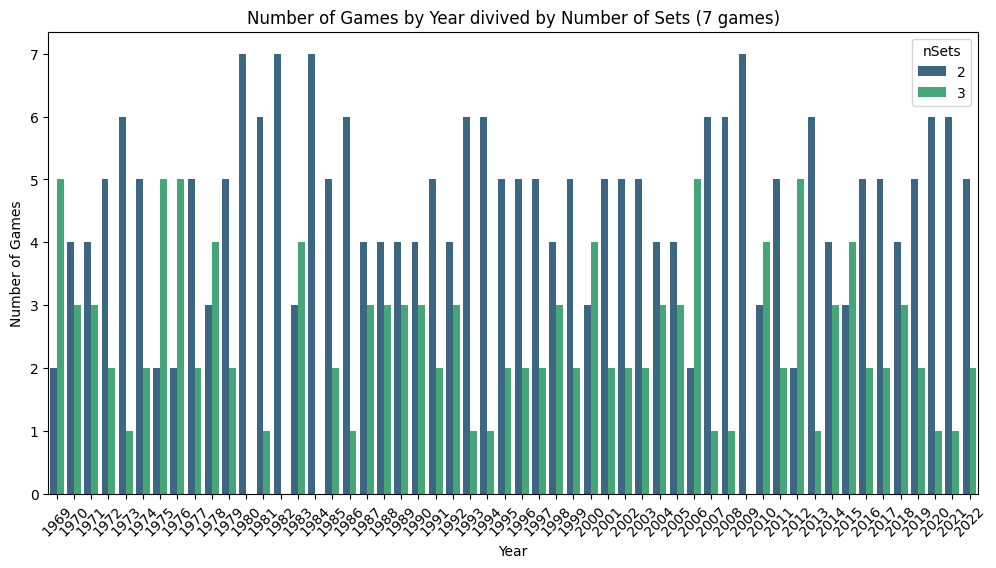

In [14]:
games_per_year = 7
stratified_sampler = StratifiedShuffleSplit(n_splits=1, test_size=games_per_year, random_state=42)
sampled_data = pd.DataFrame()
for _, group in dadosfixes.groupby('Year'):
    sampled_data = sampled_data.append(group.sample(min(games_per_year, len(group))))
plt.figure(figsize=(12, 6))
sns.countplot(data=sampled_data, x='Year', hue='nSets', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games by Year divived by Number of Sets ({} games)'.format(games_per_year))
plt.xticks(rotation=45)
plt.legend(title='nSets')
games_per_year_1 = dadosfixes['Year'].value_counts().sort_index()
print("Número de jogos por ano")
print(games_per_year_1)
plt.show()

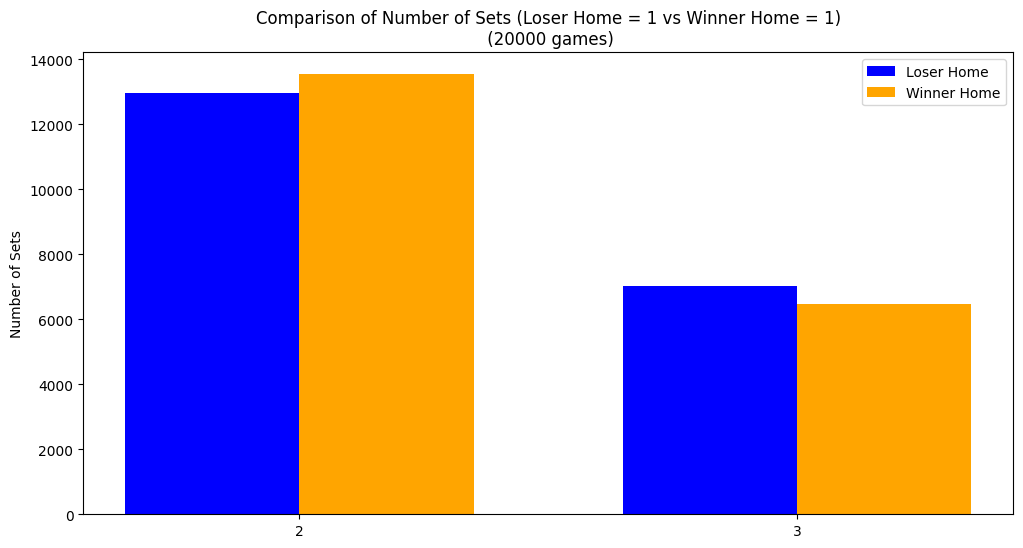

In [17]:
num_games = 20000
loser_home_data = dadosfixes[dadosfixes['loser_home'] == 1].head(num_games)
winner_home_data = dadosfixes[dadosfixes['winner_home'] == 1].head(num_games)
loser_home_counts = loser_home_data['nSets'].value_counts().sort_index()
winner_home_counts = winner_home_data['nSets'].value_counts().sort_index()
bar_width = 0.35
x = np.arange(len(loser_home_counts))
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, loser_home_counts.values, bar_width, color='blue', label='Loser Home')
ax.bar(x + bar_width/2, winner_home_counts.values, bar_width, color='orange', label='Winner Home')
ax.set_xticks(x)
ax.set_xticklabels(loser_home_counts.index)
ax.set_ylabel('Number of Sets')
ax.set_title(f'Comparison of Number of Sets (Loser Home = 1 vs Winner Home = 1)\n ({num_games} games)')
ax.legend()
plt.show()

In [ ]:
# Count the occurrences of winner_home = 1 and loser_home = 1
winner_home_count = dadosfixes['winner_home'].value_counts()[1]
loser_home_count = dadosfixes['loser_home'].value_counts()[1]

# Print the counts
print("Number of times winner_home = 1 appears:", winner_home_count)
print("Number of times loser_home = 1 appears:", loser_home_count)


In [ ]:
### 

In [ ]:
## manuel

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#Group the DataFrame by hand combination and count the occurrences of each nSets value
hand_comb_counts = dadosfixes.groupby("comb_hands", "nSets").count().orderBy("nSets")

#Extract the distinct hand combinations
hand_combinations = model_df_auto.select("comb_hands").distinct().rdd.flatMap(lambda x: x).collect()

#Define color palette
color_palette = plt.cm.get_cmap("Set3")

#Plotting
for hand_comb in hand_combinations:
    # Filter the DataFrame for the current hand combination
    hand_comb_df = hand_comb_counts.filter(hand_comb_counts.comb_hands == hand_comb)

#Extract the nSets values and counts
    nsets = [row.nSets for row in hand_comb_df.collect()]
    counts = [row["count"] for row in hand_comb_df.collect()]

#Filter nSets values to show only 2 or 3
    nsets_filtered = [nset for nset in nsets if nset in [2, 3]]
    counts_filtered = [counts[nsets.index(nset)] for nset in nsets_filtered]

#Set bar colors
    bar_colors = [color_palette(i) for i in np.linspace(0, 1, len(nsets_filtered))]

#Plot the bar plot
    plt.bar(nsets_filtered, counts_filtered, color=bar_colors)
    plt.xlabel("Number of Sets (nSets)")
    plt.ylabel("Count")
    plt.title(f"Hand Combination: {hand_comb}")
    plt.xticks(nsets_filtered)  # Set the x-axis ticks to only show 2 and 3
    plt.show()

ValueError: No axis named nSets for object type DataFrame

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Group the DataFrame by hand combination and count the occurrences of each nSets value
hand_comb_counts = dadosfixes.groupby("comb_hands", "nSets").count().orderBy("nSets")

# Extract the distinct hand combinations
hand_combinations = dadosfixes.select("comb_hands").distinct().rdd.flatMap(lambda x: x).collect()

# Define color palette
color_palette = plt.cm.get_cmap("Set3")

# Plotting
for hand_comb in hand_combinations:
    # Filter the DataFrame for the current hand combination
    hand_comb_df = hand_comb_counts.filter(hand_comb_counts["comb_hands"] == hand_comb)

    # Extract the nSets values and counts
    nsets = [row["nSets"] for row in hand_comb_df.collect()]
    counts = [row["count"] for row in hand_comb_df.collect()]

    # Filter nSets values to show only 2 or 3
    nsets_filtered = [nset for nset in nsets if nset in [2, 3]]
    counts_filtered = [counts[nsets.index(nset)] for nset in nsets_filtered]

    # Set bar colors
    bar_colors = [color_palette(i) for i in np.linspace(0, 1, len(nsets_filtered))]

    # Plot the bar plot
    plt.bar(nsets_filtered, counts_filtered, color=bar_colors)
    plt.xlabel("Number of Sets (nSets)")
    plt.ylabel("Count")
    plt.title(f"Hand Combination: {hand_comb}")
    plt.xticks(nsets_filtered)  # Set the x-axis ticks to only show 2 and 3
    plt.show()


ValueError: No axis named nSets for object type DataFrame

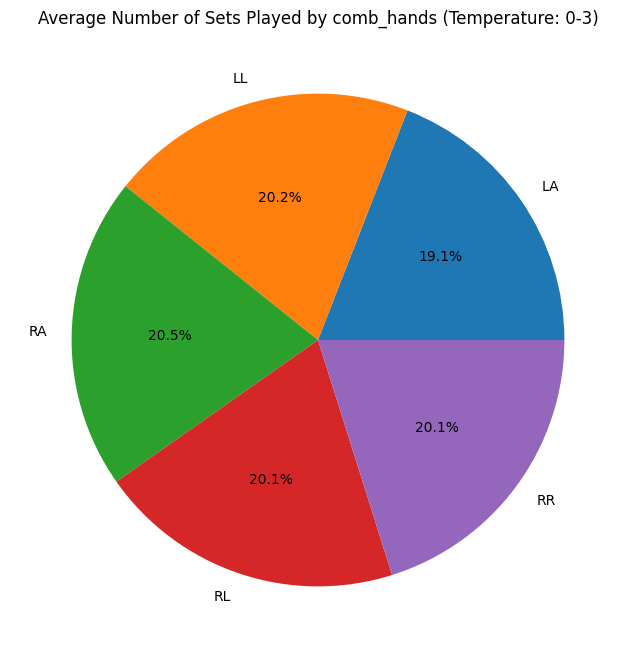

In [34]:
# Filter the data for values between 0 and 3
filtered_data = dadosfixes[(dadosfixes['nSets'] >= 0) & (dadosfixes['nSets'] <= 3)]

# Calculate the average number of sets played for each distinct value of comb_hands
grouped_data = filtered_data.groupby('comb_hands')['nSets'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
plt.title('Average Number of Sets Played by comb_hands (Temperature: 0-3)')
plt.show()


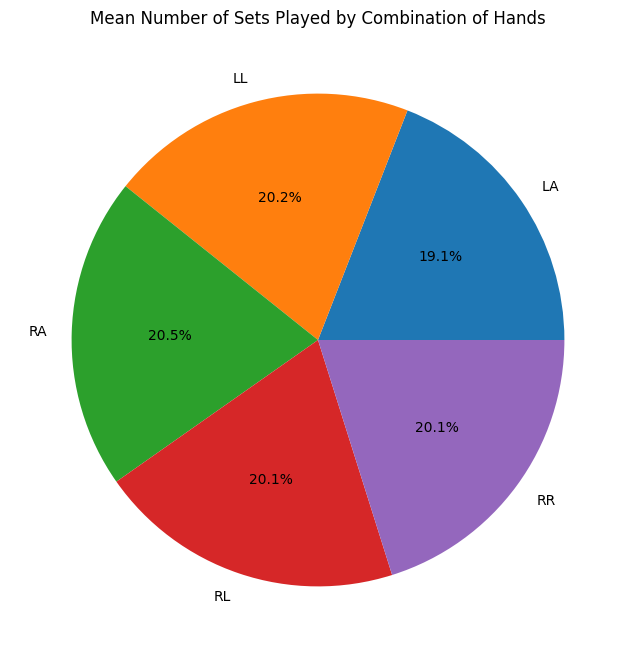

In [35]:
# Calculate the mean number of sets played for each distinct value of comb_hands
maos_numerosets = dadosfixes.loc[dadosfixes["comb_hands"].notnull(), "nSets"].groupby(dadosfixes["comb_hands"]).mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(maos_numerosets, labels=maos_numerosets.index, autopct='%1.1f%%')
plt.title('Mean Number of Sets Played by Combination of Hands')
plt.show()


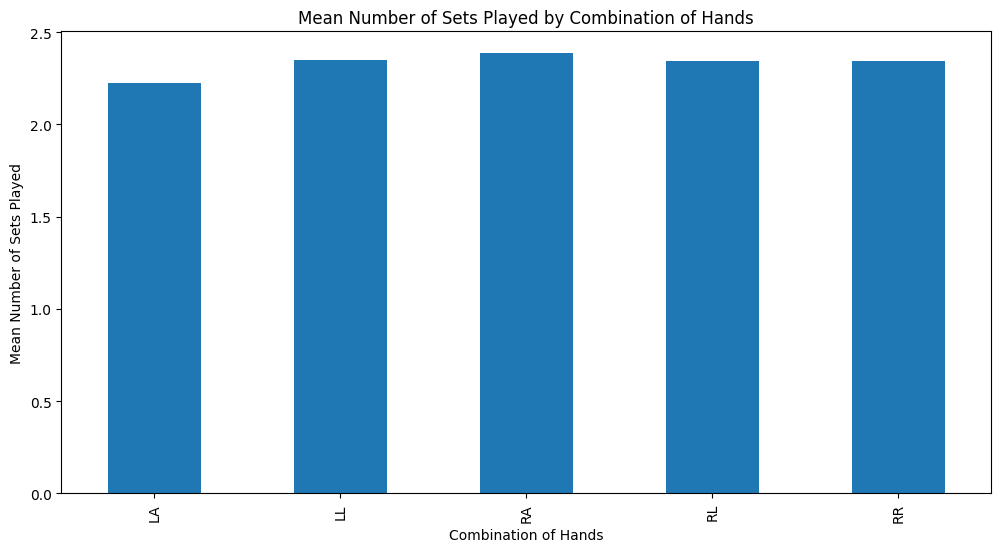

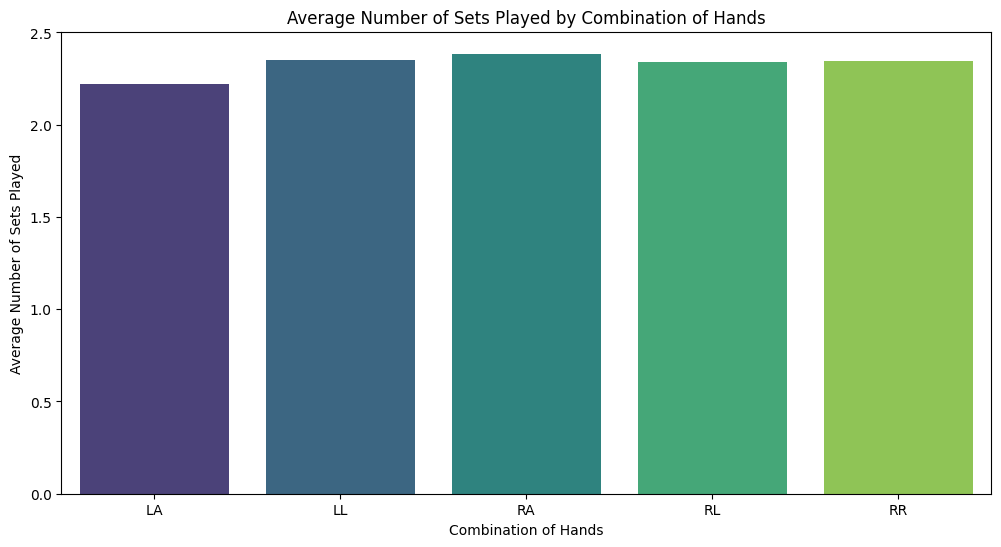

In [40]:
# media de sets jogados para cada valor distinto da combinação das mãos 
grouped_data = dadosfixes.groupby('comb_hands')['nSets'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='comb_hands', y='nSets', palette='viridis')
plt.xlabel('Combination of Hands')
plt.ylabel('Average Number of Sets Played')
plt.title('Average Number of Sets Played by Combination of Hands')
plt.show()
